# UM4MA379, Statistique Computationnelle, 2025-2026

Sorbonne Université, Master 1

Cours :  A. Guyader<br>
TP : M. Sangnier

## TP 4 : Echantillonneur de Gibbs

# Table of contents
1. [Exercice 1 : Algorithme de Gibbs](#part1)
1. [Exercice 2 : Modèle de mélange et variables latentes](#part2)
1. [Exercice 3 : Slice sampler](#part3)
1. [Exercice 4 : Modèle bayésien à deux paramètres](#part4)


In [2]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots

# Enable nice plots
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

# Exercice 1 : Algorithme de Gibbs <a id="part1"></a>
>Soit $(X,Y)$ un couple aléatoire de densité jointe sur $\mathbb R^2$, $f : (x,y) \mapsto e^{-y}\mathbf{1}_{0\leq x\leq y}$.
>
>**Question 1.**
Déterminer la loi marginale de $X$.

**Réponse :**
…

In [3]:
#on reconnait une exponentielle de parametre 1 apres integrer par rapport a y

>**Question 2.**
Sachant $X=x\geq0$, déterminer la densité conditionnelle de $Y | X=x$, notée $f_{Y | X=x}$. Quelle loi reconnaissez-vous ?

**Réponse :**
…

In [4]:
#on reconnait une exponentielle translatée de parametre 1 et translation x

>**Question 3.**
En déduire une méthode pour simuler une réalisation du couple aléatoire $(X,Y)$. L'implémenter pour simuler un échantillon de couples $(X_1,Y_1),\dots,(X_n,Y_n)$ de taille $n=1000$. Représenter le nuage de points ainsi obtenu. 

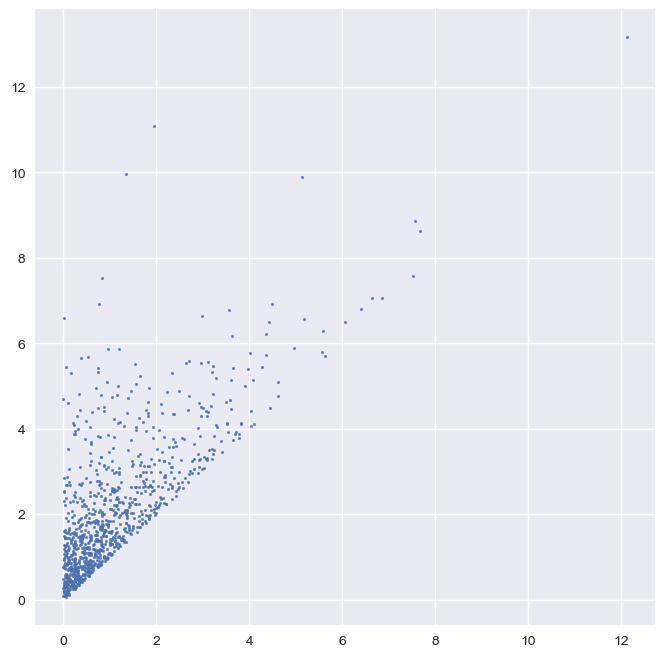

In [5]:
# Answer
from numpy.random import default_rng
rng=default_rng()
n = 1000

exp = stats.expon()


# Compléter
#d'abord simulons X u'on sait que suit une exp de parametre 1
X = exp.rvs(size=n, random_state=rng)
Y = exp.rvs(size=n, random_state=rng) + X
# Fin compléter

plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=3);

>**Question 4.**
Sachant $Y=y\geq 0$, déterminer la densité conditionnelle de $X | Y=y$, notée $f_{X | Y=y}$. Quelle loi reconnaissez-vous ?

**Réponse :**
…

In [6]:
#on reconnait que la marginale de Y est une gamma de parametres (2,1) et que alors la loi de X conditionnée à Y est une uniforme
#de 0 a y

>**Question 5.**
En partant par exemple du point $(x_0,y_0)=(0,1)$, proposer un échantillonneur de Gibbs pour obtenir une trajectoire $\left( (X_1, Y_1),\dots,(X_n, Y_n) \right)$ de densité cible $f$. Représenter le nuage de points ainsi obtenu.

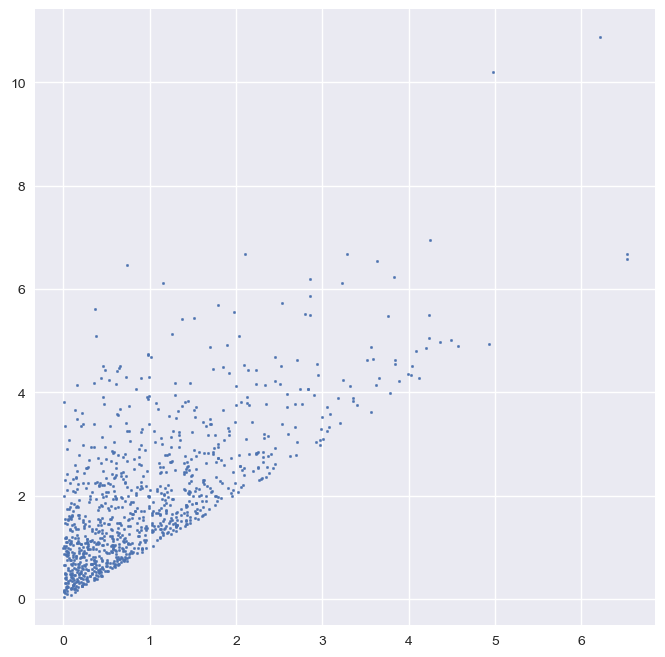

In [7]:
# Answer
unif = stats.uniform()


X, Y = [0], [1]
for i in range(n-1):
    X.append(unif.rvs(random_state=rng) * Y[-1])
    Y.append(exp.rvs(random_state=rng) + X[-1])
    
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=3);

>**Question 6.**
Des deux méthodes proposées, laquelle choisiriez-vous pour simuler selon la densité $f$ ?

**Réponse :**
…

In [8]:
#dans la premiere méthode on simule directement avec la loi marginale+conditionnelle, donc est mieux. Avec Gibbs on juste sait que asymptotiquement
#on aura convergence en variation totale vers la loi jointe qui est la loi stationnaire car le produit des domaines des marginales
# est le domain de la loi jointe

# Exercice 2 : Modèle de mélange et variables latentes <a id="part2"></a>
>Soient $(a,b)\in(\mathbb{R}_+^*)^2$, $(m_0,m_1)\in\mathbb{R}^2$, $(\sigma_0,\sigma_1)\in(\mathbb{R}_+^*)^2$ connus et fixés.
On considère le schéma bayésien suivant :
$$
    \begin{cases}
        \boldsymbol \theta \sim \text{Beta}(a, b)\\
        \mathbf{X}=(X_1,\dots,X_N) | \boldsymbol \theta \sim \left( \boldsymbol \theta \mathcal N(m_1, \sigma_1^2) + (1-\boldsymbol \theta) \mathcal N(m_0, \sigma_0^2) \right)^{\otimes N}.
    \end{cases}
$$
Autrement dit, sachant ${\boldsymbol{\theta}}=\theta$, les observations $X_1,\dots,X_N$ sont i.i.d. selon le mélange de gaussiennes de densité
$$p_\theta(x)=(1-\theta)\phi_0(x)+\theta\phi_1(x)=(1-\theta)\times\frac{1}{\sqrt{2\pi\sigma_0^2}}e^{-\frac{(x-m_0)^2}{2\sigma_0^2}}+\theta\times\frac{1}{\sqrt{2\pi\sigma_1^2}}e^{-\frac{(x-m_1)^2}{2\sigma_1^2}}.$$
>
>**Question 1.**
Déterminer la loi a posteriori, c'est-à-dire $\mathrm{Loi}({\boldsymbol{\theta}}|\mathbf{X})$. Est-ce une loi classique ?

**Réponse :**
…

In [9]:
#non n'est pas une loi classique

>Le schéma bayésien précédent est équivalent à la construction hiérarchique suivante :
$$
    \begin{cases}
        \boldsymbol \theta \sim \text{Beta}(a, b)\\
        \mathbf{Z}=(Z_1,\dots,Z_N) | \boldsymbol \theta \sim \text{Ber}(\boldsymbol \theta)^{\otimes N}\\
        \mathbf{X}=(X_1,\dots,X_N) | (\boldsymbol \theta, \mathbf Z) \sim \mathcal N(m_{Z_1}, \sigma_{Z_1}^2) \otimes \dots \otimes \mathcal N(m_{Z_N}, \sigma_{Z_N}^2).
    \end{cases}
$$
Autrement dit, sachant ${\boldsymbol{\theta}}=\theta$, les variables $\mathbf{Z}=(Z_1,\dots,Z_N)\in\{0,1\}^N$ (appelées variables latentes car non observées) sont i.i.d.\ selon la loi de Bernoulli $\mathrm{Ber}(\theta)$,
et sachant $\mathbf{Z}=\mathbf{z}$ et ${\boldsymbol{\theta}}=\theta$, les observations $\mathbf{X}=(X_1,\dots,X_N)$ sont indépendantes avec 
$$\mathrm{Loi}(X_j|\mathbf{Z}=\mathbf{z},{\boldsymbol{\theta}}=\theta)=\mathrm{Loi}(X_j|Z_j=z_j,{\boldsymbol{\theta}}=\theta)=\mathrm{Loi}(X_j|Z_j=z_j)=\mathcal N(m_{z_j},\sigma_{z_j}^2).$$
>
>**Question 2.**
Simuler une observation $\mathbf X$ de taille $N=5000$ avec $(a, b)=(2, 3)$, $(m_0, m_1) = (-2, 3)$ et $\sigma_0 = \sigma_1 = 1$.
Afficher un histogramme des $X_i$ et la réalisation de $\boldsymbol \theta$ obtenue.

Vrai theta : 0.5760456275483194


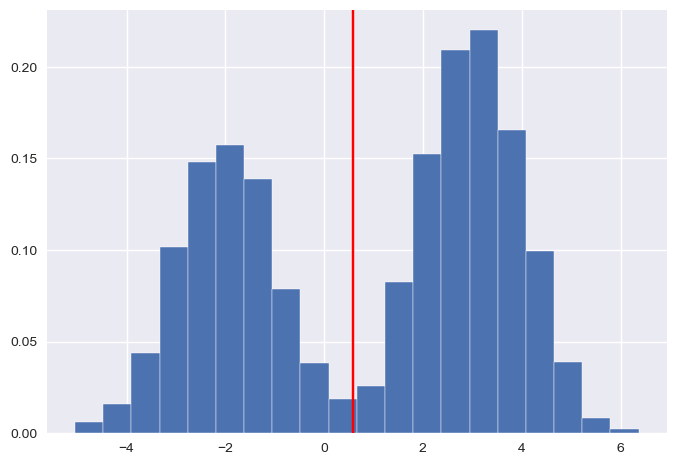

In [10]:
# Answer
a, b = 2, 3
mn, mp = -2, 3
sigman, sigmap = 1, 1
N = 5000

# Lois utiles
prior = stats.beta(a, b)
true_theta = prior.rvs()


# Échantillonnage de Z et X
Z = stats.bernoulli.rvs(true_theta, size=N, random_state=rng)
X = ((Z==1)*mp + (Z==0)*mn) + stats.norm.rvs(size=N, random_state=rng)*((Z==0)*sigman + (Z==1)*sigmap)

# Histogramme et vraie valeur de theta
plt.hist(X, **nice_hist);
plt.axvline(true_theta, color='r')
print("Vrai theta :", true_theta)

>**Question 3.**
Quelle  est la loi de ${\boldsymbol{\theta}}$ sachant $(\mathbf{Z},\mathbf{X})$ ?

**Réponse :**
…

In [11]:
#on reconnait une loi beta

>**Question 4.**
Quelle est la loi de $Z_1$ sachant $({\boldsymbol{\theta}},\mathbf{X},Z_2,\dots,Z_N)$

**Réponse :**
…

>**Question 5.**
En déduire un échantillonneur de Gibbs permettant de construire, sachant $\mathbf{X}$, une chaîne de Markov $(({\boldsymbol{\theta}}_n,\mathbf{Z}_n))_{n\geq 0}$ admettant pour loi stationnaire la loi a posteriori du couple  $({\boldsymbol{\theta}},\mathbf{Z})$, c'est-à-dire $\mathrm{Loi}(({\boldsymbol{\theta}},\mathbf{Z})|\mathbf{X})$.
L'implémenter pour obtenir une chaîne de longueur $n=10^4$.

**Réponse :**
…

In [23]:
# Answer
n = 10**4

theta0 = prior.rvs()

sample_theta = [theta0]
sample_Z = [stats.bernoulli.rvs(p=theta0, size=N)]
for i in range(n):
    theta, Z = sample_theta[-1], sample_Z[-1]
    # Échantillonnage de theta_prime et Z_prime
    theta_prime = stats.beta.rvs(a+(Z.sum()), b+(N-Z.sum()))
    Z_prime = stats.bernoulli.rvs(p=(theta_prime*stats.norm.pdf(X, loc=mp,scale=sigmap))/((theta_prime*stats.norm.pdf(X, loc=mp, scale=sigmap))+(1-theta_prime)*stats.norm.pdf(X, loc=mn, scale=sigman)))
    # Fin compléter
    sample_theta.append(theta_prime)
    sample_Z.append(Z_prime)

>**Question 6.**
Afficher un histogramme des $\boldsymbol \theta_i$ et superposer la valeur du « vrai theta ».
Donner une approximation de l'estimateur bayésien de $\boldsymbol \theta$ pour la perte quadratique et d'une région de crédibilité de niveau $1-\alpha$, avec $\alpha=5\%$.

**Réponse :**
…

2880
0.5758241758241758
4.8791588965358465e-05
Vrai theta : 0.5760456275483194
Approximation du vrai theta : 0.5766631087486878
Approximation avec la moyenne a posteriori : 0.5758241758241758
Approximation d'un intervalle : [0.575687, 0.575961]


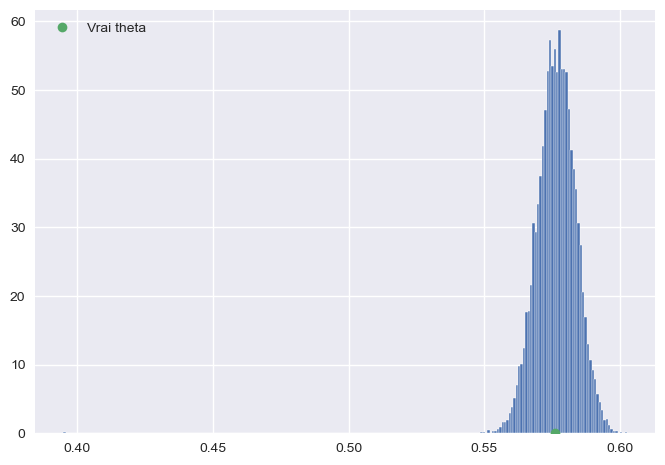

In [38]:
# Answer
alpha = 0.05

# Histogramme
plt.hist(sample_theta, **nice_hist)
plt.plot(true_theta, 0, "o", label="Vrai theta")
plt.legend();

# Bornes inférieure (inter_low) et supérieure (inter_up) de l'intervalle de crédibilité
#en utilisant la response de la question 3, on trouve que la moyenne a posteriori est:
print(sample_Z[-1].sum())
moy_post = (a + sample_Z[-1].sum())/ (a+b+N)
print(moy_post)
var_post = ((a+sample_Z[-1].sum())*(b+N-sample_Z[-1].sum()))/(((a+sample_Z[-1].sum())+(b+N-sample_Z[-1].sum()))**2 * ((a+sample_Z[-1].sum() + b+N-sample_Z[-1].sum() + 1)))
print(var_post)
inter_low = moy_post - stats.norm.ppf(0.975)*np.sqrt(var_post/n)
inter_up = moy_post + stats.norm.ppf(0.975)*np.sqrt(var_post/n)

# Fin compléter

print("Vrai theta :", true_theta)
print("Approximation du vrai theta :", np.mean(sample_theta))
print("Approximation avec la moyenne a posteriori :", moy_post)
print(f"Approximation d'un intervalle : [{inter_low:0.6f}, {inter_up:0.6f}]")

# Exercice 3 : Slice sampler <a id="part3"></a>
>On considère la fonction $f : (x,y) \in \mathbb R^2 \mapsto \mathbf 1_{x>0} \mathbf 1_{0<y<\frac{1}{2}\exp \left(-\sqrt{x} \right)}$.
>
>**Question 1.**
Montrer que $g : x \mapsto \frac{1}{2}\exp \left(-\sqrt{x} \right)\mathbf 1_{x>0}$ est une densité sur $\mathbb{R}$. En déduire que $f$ est une densité sur $\mathbb{R}^2$.

**Réponse :**
…

>**Question 2.**
Soit $(X,Y)$ de densité $f$.
Déterminer, pour tout $(x,y) \in \mathbb R_+^* \times \mathbb R_+^*$, les lois conditionnelles de $Y | X=x$ et $X | Y=y$.

**Réponse :**
…

>**Question 3.**
En partant du point $(X_0,Y_0)=(1, 1/(4e))$, implémenter un échantillonneur de Gibbs pour obtenir une trajectoire $(X_1,Y_1),\dots,(X_n,Y_n)$ de taille $n=1000$ et de densité cible $f$.

In [ ]:
# Answer
n = 1000

unif = stats.uniform()

X, Y = [1], [0.25 / np.exp(1)]
for i in range(n):
    # Compléter

    # Fin compléter

# Figure
plt.scatter(X, Y, s=1)
plt.xlabel("X")
plt.ylabel("Y");

>**Question 4.**
Sur un même graphe, représenter la densité $g$ et un estimateur de la densité obtenu à partir de la trajectoire $X_1,\dots,X_n$.

In [ ]:
# Answer

**Réponse :**
…

# Exercice 4 : Modèle bayésien à deux paramètres <a id="part4"></a>
>Considérons le modèle suivant :
$$
    \begin{cases}
        \boldsymbol \theta = (\boldsymbol \theta_1, \boldsymbol \theta_2) \sim \mathcal N(0, 1) \otimes \text{Exp}(1)\\
        \mathbf X = (X_1, \dots, X_N) | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta_1, \boldsymbol \theta_2^{-1})^{\otimes N}.
    \end{cases}
$$
>
>**Question 1.**
Simuler $\mathbf X$ suivant le modèle précédent avec $N=5000$.
Quelle est la réalisation de $\boldsymbol \theta$ obtenue ?

In [ ]:
# Answer
N = 5000

# Vrai theta et loi ptheta
true_theta = (stats.norm.rvs(), stats.expon.rvs())
# Compléter

# Fin compléter

# Échantillonnage de X
# Compléter

# Fin compléter

print("Vrai theta :", true_theta)

>**Question 2.**
Déterminer la loi a posteriori, c'est-à-dire $\mathrm{Loi}({\boldsymbol{\theta}}|\mathbf{X})$. Est-ce une loi classique ?

**Réponse :**
…

>**Question 3.**
Déterminer les lois a posteriori conditionnelles $\mathrm{Loi}(\boldsymbol \theta_1|\boldsymbol \theta_2, \mathbf{X})$ et $\mathrm{Loi}(\boldsymbol \theta_2|\boldsymbol \theta_1, \mathbf{X})$.

**Réponse :**
…

>**Question 4.**
En déduire un échantillonneur de Gibbs séquentiel pour $\text{Loi}(\boldsymbol \theta | \mathbf X)$.
L'implémenter pour obtenir une chaîne de longueur $n=10^4$.

In [ ]:
# Answer
n = 10**4

sample_theta1 = [stats.norm.rvs()]
sample_theta2 = [stats.expon.rvs()]

for i in range(n):
    theta1, theta2 = sample_theta1[-1], sample_theta2[-1]
    # Échantillonnage de theta1_prime puis de theta2_prime
    # Compléter

    # Fin compléter
    sample_theta1.append(theta1_prime)
    sample_theta2.append(theta2_prime)

# Conversion en tableaux NumPy
sample_theta1 = np.asarray(sample_theta1)
sample_theta2 = np.asarray(sample_theta2)

>**Question 5.**
Afficher l'évolution d'une estimation Monte-Carlo de $\mathbb E[\|\boldsymbol \theta\|^2 | \mathbf X]$.

In [ ]:
# Answer
# Calcul de l'estimateur Monte-Carlo
# Compléter

# Fin compléter

# Valeur estimée
true_norm_squared = np.sum(np.array(true_theta)**2)

# Tracé du graphique
fig = plt.figure()
# Compléter

# Fin compléter
plt.xlabel('n')
plt.ylim(*(np.r_[0.95, 1.05] * estMC[-1]))
plt.legend();

>**Question 6.**
Comparer avec le résultat obtenu par un échantillonneur de Gibbs à balayage aléatoire.

In [ ]:
# Answer
choices = stats.bernoulli.rvs(p=0.5, size=2*n)

sample_theta1_rdm = [stats.norm.rvs()]
sample_theta2_rdm = [stats.expon.rvs()]

for i in range(2*n):
    theta1, theta2 = sample_theta1_rdm[-1], sample_theta2_rdm[-1]
    # Échantillonnage de theta1_prime (si choices[i]=0) ou de theta2_prime (si choices[i]=1)
    # Compléter

    # Fin compléter
    sample_theta1_rdm.append(theta1_prime)
    sample_theta2_rdm.append(theta2_prime)

# Conversion en tableaux NumPy
sample_theta1_rdm = np.asarray(sample_theta1_rdm)
sample_theta2_rdm = np.asarray(sample_theta2_rdm)

In [ ]:
# Answer
# Calcul de l'estimateur Monte-Carlo
# Compléter

# Fin compléter

# Tracé du graphique
fig = plt.figure()
plt.plot(estMC, label="Estimateur Monte-Carlo (Gibbs séquentiel)")
# Compléter

# Fin compléter
plt.xlabel('n')
plt.ylim(*(np.r_[0.95, 1.05] * estMC[-1]))
plt.legend();